In [464]:
from constants import *
import mne
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import CSP


In [465]:
n_channels = 32

data_path = '/Users/seonghyunyoon/Developer/cp-eeg/Data/nature/'
save_path = '/Users/seonghyunyoon/Developer/conformal_prediction_bmi/test 3 (temporal)/'
model_path = f'{save_path}/saved_models/'

In [466]:
def create_raw(data, labels, info, freq=250):
    labels = np.ravel(labels)
    ch_names = info.ch_names
    si, sj, sk = data.shape
    da = data.transpose(1, 0, 2)
    da = da.reshape(sj, si*sk)
    llen = data.shape[0]
    events = np.zeros((llen, 3))
    info = mne.create_info(
        ch_names=ch_names,
        ch_types="eeg",  # channel type
        sfreq=freq  # frequency
    )
    raw = mne.io.RawArray(da, info)  # create raw
    for i in range(llen):
        events[i, 0] = i * sk
        events[i, 2] = labels[i]
    events = events.astype(int)
    montage = mne.channels.make_standard_montage('standard_1005')
    raw.set_montage(montage)
    return raw, events

In [467]:
X = []
y = []

for subj in range(1, 26): 
    X_subj = [] 
    y_subj = [] 
    for se in range(1, 6): 
        path=r'/Users/seonghyunyoon/Developer/cp-eeg/Data/nature/sub-0{}_ses-0{}_task_motorimagery_eeg.mat'.format(str(subj).zfill(2),str(se))

        info = mne.create_info(
            ch_names=["Fp1", "Fp2", "Fz", "F3", "F4", "F7", "F8", "FC1", "FC2", "FC5",
                    "FC6", "Cz", "C3", "C4", "T3", "T4", "A1", "A2", "CP1", "CP2",
                    "CP5", "CP6", "Pz", "P3", "P4", "T5", "T6", "PO3", "PO4", "Oz",
                    "O1", "O2"],
            ch_types='eeg', sfreq=250)
        
        da=sio.loadmat(path)
        data=da['data']
        labels=np.ravel(da['labels'])

        raw, event = create_raw(data, labels, info)
        raw.filter(8, 30, fir_design='firwin', skip_by_annotation='edge')
        event_id = dict(left=1, right=2)
        picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, ecg=False, exclude='bads')
        epochs = mne.Epochs(raw, event, event_id, 0, 3.996, proj=True, picks=picks, baseline=None, preload=True)
        data=epochs.get_data()
        X_subj.append(np.array(data))
        y_subj.append(np.ravel(labels) - 1)
    X.append(X_subj)
    y.append(y_subj)

Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=99000
    Range : 0 ... 98999 =      0.000 ...   395.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activate

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Creating RawArray with float64 data, n_channels=32, n_times=94000
    Range : 0 ... 93999 =      0.000 ...   375.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 94 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=92000
    Range : 0 ... 91999 =      0.000 ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 92 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=95000
    Range : 0 ... 94999 =      0.000 ...   379.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 95 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=92000
    Range : 0 ... 91999 =      0.000 ...   367.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 92 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter paramet

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=87000
    Range : 0 ... 86999 =      0.000 ...   347.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activate

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipyker

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 97 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=91000
    Range : 0 ... 90999 =      0.000 ...   363.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=94000
    Range : 0 ... 93999 =      0.000 ...   375.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activate

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | e

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=93000
    Range : 0 ... 92999 =      0.000 ...   371.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=89000
    Range : 0 ... 88999 =      0.000 ...   355.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 89 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=93000
    Range : 0 ... 9

/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend Seque

Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 94 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=95000
    Range : 0 ... 94999 =      0.000 ...   379.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=95000
    Range : 0 ... 94999 =      0.000 ...   379.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 95 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 

/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend Seque

Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=96000
    Range : 0 ... 95999 =      0.000 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 .

/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend Seque

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=94000
    Range : 0 ... 93999 =      0.000 ...   375.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activate

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will

Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 89 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=96000
    Range : 0 ... 95999 =      0.000 ...   383.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 98 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter paramet

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=96000
    Range : 0 ... 95999 =      0.000 ...   383.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
96 matching events found
No baseline correc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 99 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=89000
    Range : 0 ... 88999 =      0.000 ...   355.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 97 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activate

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

0 projection items activated
Using data from preloaded Raw for 94 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points 

/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend Seque

Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=97000
    Range : 0 ... 96999 =      0.000 ...   387.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 97 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=87000
    Range : 0 ... 8

/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend Seque

- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
83 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 83 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=95000
    Range : 0 ..

/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend Seque

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activa

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | e

Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 95 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=92000
    Range : 0 ... 91999 =      0.000 ...   367.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter param

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 95 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=85000
    Range : 0 ... 84999 =      0.000 ...   339.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
85 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 98 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter paramet

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activa

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 91 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stop

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=98000
    Range : 0 ... 97999 =      0.000 ...   391.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activate

/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend Seque

Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 95 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=94000
    Range : 0 ... 93999 =      0.000 ...   375.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=95000
    Range : 0 ... 94999 =      0.000 ...   379.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activate

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 94 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=92000
    Range : 0 ... 91999 =      0.000 ...   367.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | e

Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 93 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=89000
    Range : 0 ... 88999 =      0.000 ...   355.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
89 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | e

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activa

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=94000
    Range : 0 ... 93999 =      0.000 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 99 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=93000
    Range : 0 ... 92999 =      0.000 ...   371.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=96000
    Range : 0 ... 95999 =      0.000 ...   383.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 96 events and 1000 original time points ..

/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend Seque

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ...   399.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activa

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 93 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=96000
    Range : 0 ... 95999 =      0.000 ...   383.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

Creating RawArray with float64 data, n_channels=32, n_times=99000
    Range : 0 ... 98999 =      0.000 ...   395.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 99 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 97 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=74000
    Range : 0 ... 73999 =      0.000 ...   295.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
74 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=98000
    Range : 0 ... 97999 =      0.000 ...   391.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
98 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 98 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 

/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend Seque

Creating RawArray with float64 data, n_channels=32, n_times=88000
    Range : 0 ... 87999 =      0.000 ...   351.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 88 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=92000
    Range : 0 ... 91999 =      0.000 ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

Creating RawArray with float64 data, n_channels=32, n_times=88000
    Range : 0 ... 87999 =      0.000 ...   351.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)

Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 88 events and 1000 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=32, n_times=100000
    Range : 0 ... 99999 =      0.000 ..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/var/folders/_z/_4jv4z3n0gs0lmmsrf6xf1sr0000gn/T/ipykernel_9848/2650052008.py:26: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data=epochs.get_data()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | 

In [468]:
total = 0 
for i in range(25): 
    for j in range(5): 
        total += X[i][j].shape[0]
total

11988

In [359]:
X_train_val = np.expand_dims(np.vstack([X[subject_num][0] for subject_num in range(25)]), axis=1)
X_tests = [np.expand_dims(np.vstack([X[subject_num][i] for subject_num in range(25)]), axis=1) for i in range(1, 5)]
y_train_val = to_categorical(np.hstack([y[subject_num][0] for subject_num in range(25)]))
y_tests = [to_categorical(np.hstack([y[subject_num][i] for subject_num in range(25)])) for i in range(1, 5)]

In [360]:
all_X_train = []
all_y_train = []
all_X_val = []
all_y_val = []
all_X_test = []
all_y_test = []

for subject_num in range(25): 
    X_train_val = np.expand_dims(X[subject_num][0], axis=1)
    y_train_val = to_categorical(y[subject_num][0])
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.6, random_state=42)
    all_X_train.append(X_train)
    all_y_train.append(y_train)
    all_X_val.append(X_val)
    all_y_val.append(y_val)
    
    X_test = [np.expand_dims(X[subject_num][i], axis=1) for i in range(1, 5)]
    y_test = [to_categorical(y[subject_num][i]) for i in range(1, 5)]
    all_X_test.append(X_test)
    all_y_test.append(y_test)

In [361]:
for subject_num in tqdm(range(25)): 
    X_train = all_X_train[subject_num]
    y_train = all_y_train[subject_num]
    X_val = all_X_val[subject_num]
    y_val = all_y_val[subject_num]
    X_tests = all_X_test[subject_num]
    y_tests = all_y_test[subject_num]

    for j in range(32):
        scaler = StandardScaler()
        scaler.fit(X_train[:,0,j,:])
        all_X_train[subject_num][:,0,j,:] = scaler.transform(X_train[:,0,j,:])
        all_X_val[subject_num][:,0,j,:] = scaler.transform(X_val[:,0,j,:])
        for i in range(4): 
            all_X_test[subject_num][i][:,0,j,:] = scaler.transform(X_tests[i][:,0,j,:])

  0%|          | 0/25 [00:00<?, ?it/s]

In [469]:
all_X_val[0].shape

(40, 1, 32, 1000)

In [362]:
all_models = []

for subject_num in range(25): 
    model = EEGTCNet(nb_classes=2, Chans=32, Samples=1000, layers=L, kernel_s=KT, filt=FT, dropout=pt, activation='elu', F1=F1, D=2, kernLength=KE, dropout_eeg=pe)
    model.load_weights(f'{model_path}/model_{subject_num+1}.h5')
    all_models.append(model)

## Pvalues

In [149]:
all_models[0].predict(all_X_test[0][3]).argmax(1)

3/3 [==============================] - 0s 16ms/step


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [227]:
from scipy.stats import ks_2samp

n_subjects = 25
n_sessions = 5
percentages = np.arange(0.01,1.01,0.01)
n_iters = 50
pvalues = np.zeros((n_sessions, n_subjects, len(percentages), n_iters))

for subject_num in tqdm(range(25), total=25): 
    model = all_models[subject_num]
    X_val, X_test, y_val, y_test = train_test_split(all_X_val[subject_num], all_y_val[subject_num], train_size=0.6, random_state=42)

    n_test = X_test.shape[0]
    val_smx = model.predict(X_val, verbose=False); test_smx = model.predict(X_test, verbose=False)
    
    for p_i, percentage in enumerate(percentages): 
        curr_n_test = int(np.ceil(percentage * n_test))
        for iter in range(n_iters): 
            random_indices = np.random.choice(n_test, size=curr_n_test, replace=False)
            val_score, test_score = get_conformity_scores(val_smx, y_val, test_smx[random_indices], y_test[random_indices])
            pvalues[0, subject_num, p_i, iter] = ks_2samp(val_score, test_score)[1]
            
for subject_num in tqdm(range(25)): 
    model = all_models[subject_num]
    X_val = all_X_val[subject_num]; y_val = all_y_val[subject_num]

    n_test = X_val.shape[0]
    val_smx = model.predict(X_val, verbose=False)
    for se in range(4): 
        X_test = all_X_test[subject_num][se]
        y_test = all_y_test[subject_num][se]
        test_smx = model.predict(X_test, verbose=False)
        for p_i, percentage in enumerate(percentages): 
            curr_n_test = int(np.ceil(percentage * n_test))
            for iter in range(n_iters): 
                random_indices = np.random.choice(n_test, size=curr_n_test, replace=False)
                val_score, test_score = get_conformity_scores(val_smx, y_val, test_smx[random_indices], y_test[random_indices])
                pvalues[se+1, subject_num, p_i, iter] = ks_2samp(val_score, test_score)[1]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [47]:
np.save(f'{save_path}/pvalues.npy', pvalues)

In [163]:
pvalues.shape

(5, 25, 100, 50)

In [225]:
np.mean(pvalues[1,:,-2,0].T < 0.05)

0.56

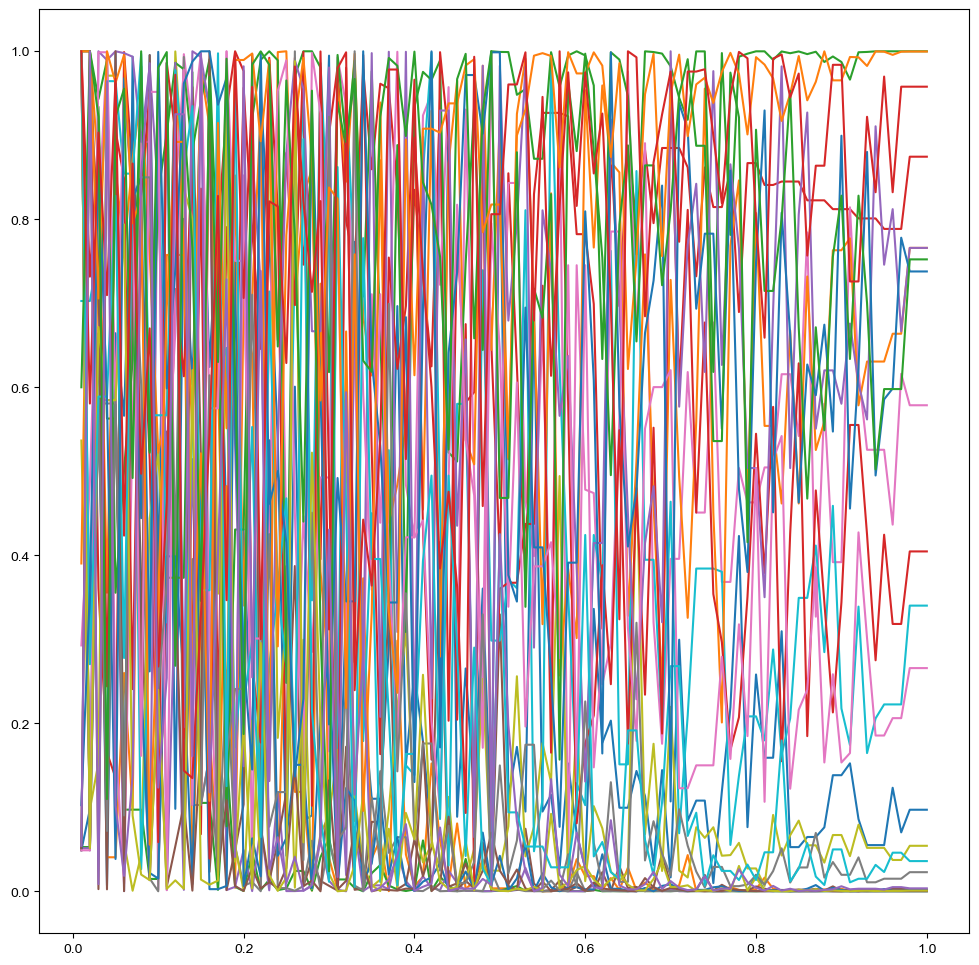

In [228]:
plt.figure(figsize=(12,12))
plt.plot(percentages, pvalues[1,:,:,0].T)

In [470]:
pvalues = np.load(f'{save_path}/pvalues.npy')

In [165]:
pvalues[0].shape

(25, 100, 100)

0.8492151350803753
0.10267668164822814
0.09036199647650761
0.06239251832046147
0.06267984961658402


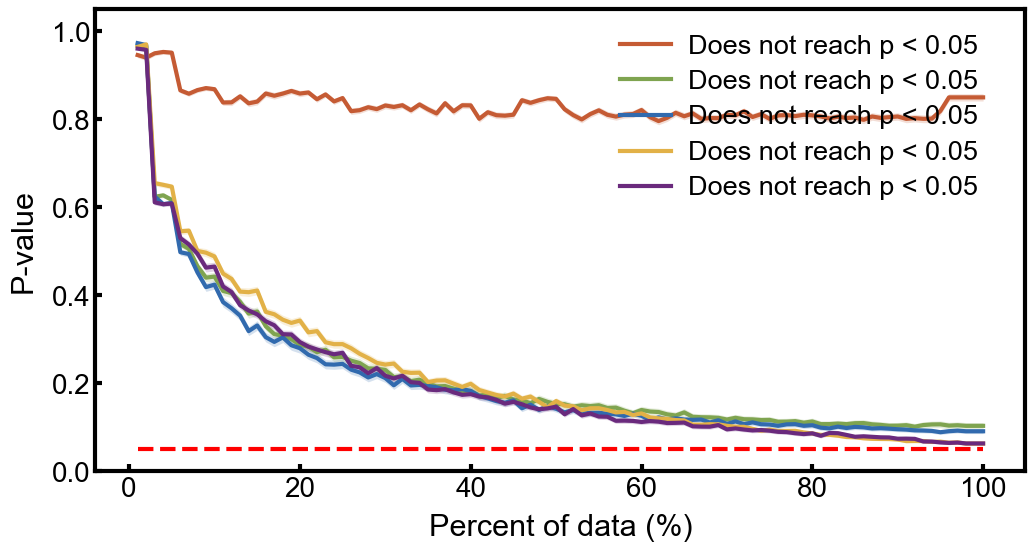

In [472]:
from plotting import * 

color_i = [0, 2, 1, 4, 7]

all_alphas = np.arange(0.01, 1.01, 0.01)
fig = plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'Arial'

plt.plot(100 * all_alphas, [0.05] * len(all_alphas), 'r--', linewidth=3)

for i in range(5): 
    x1, x2, x3 = pvalues[i].shape
    pvalues_reshaped = pvalues[i].transpose(0, 2, 1)
    pvalues_reshaped = pvalues_reshaped.reshape(x1 * x3, x2)
    avg, ci_lower, ci_upper = compute_ci_mean(pvalues_reshaped)
    print(avg[-1])
    plt.plot(100 * all_alphas, avg, color=color_scheme[color_i[i]], linewidth=3)
    plt.fill_between(100 * all_alphas, ci_lower, ci_upper, color=color_scheme[color_i[i]], alpha=.2, linewidth=0)
    plt.grid(False)

    plt.tick_params(axis='both',          # Applies to both x and y axis
                    which='both',         # Applies to both major and minor ticks
                    direction='in',       # Sets ticks to the inside
                    bottom=True,          # Enables bottom ticks
                    top=False,             # Enables top ticks
                    left=True,            # Enables left ticks
                    right=False)           # Enables right ticks
    plt.tick_params(axis='both', length=5, width=3)

    for spine in plt.gca().spines.values():
        spine.set_linewidth(3)  # Set the thickness here

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20) 

    #plt.xticks(x, labels=['0', '20', '40', '60', '80', '100'], fontsize=20) 

    plt.xlabel('Percent of data (%)', fontsize=22, labelpad=8, fontdict=dict(fontstretch = 'condensed'))
    plt.ylabel('P-value', fontsize=22, labelpad=10, fontdict=dict(fontstretch = 'condensed'))#, fontdict=dict(weight='bold'))
    plt.ylim(0, 1.05)
    
    first_percentage = all_alphas[np.argmax(avg < 0.05)] * 100
    if first_percentage != all_alphas[0] * 100: 
        plt.text(65.5, 0.95-0.08*i, rf'Reaches p < 0.05: {first_percentage:.0f}%', fontsize=20, fontdict=dict(fontstretch = 'condensed'))
        plt.plot([57.5, 63.5], [0.971-0.081*i, 0.971-0.081*i], color=color_scheme[color_i[i]], linewidth=3)
    else: 
        plt.text(65.5, 0.95-0.08*i, rf'Does not reach p < 0.05', fontsize=19.5, fontdict=dict(fontstretch = 'condensed'))
        plt.plot([57.5, 63.5], [0.971-0.081*i, 0.971-0.081*i], color=color_scheme[color_i[i]], linewidth=3)
plt.show()


In [77]:
all_alphas = np.arange(0.05, 0.99, 0.01)
n_alphas = len(all_alphas)

baseline_coverage = np.zeros((25 * n_iters, n_alphas))

for subject_num in tqdm(range(25), total=25): 
    model = all_models[subject_num]
    X_val = all_X_val[subject_num]; y_val = all_y_val[subject_num]
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size=0.7, random_state=42)
    val_smx = model.predict(X_val, verbose=False); test_smx = model.predict(X_test, verbose=False)
    for i_alpha, alpha in enumerate(all_alphas):
        for i_iter in range(n_iters): 
            save_idx = subject_num*n_iters + i_iter
            pred_set, _ = conformalRAPS(val_smx, y_val, test_smx, alpha=alpha, lam_reg=.01, k_reg=0, rand=True, disallow_zero_sets=False)
            baseline_coverage[save_idx, i_alpha] = get_coverage(y_test, pred_set)
            # pred_set, _ = conformalRAPS(val_smx, y_val, test_smx, alpha=alpha, lam_reg=.02, k_reg=1, rand=True, disallow_zero_sets=True)
            # set_size = get_set_size(pred_set, n_classes)
            # prediction_rates[i, save_idx, i_alpha] = (set_size[0] + set_size[1]) / sum(set_size.values())
            # accuracies[i, save_idx, i_alpha] = get_abstain_metrics(pred_set, test_smx, y_test, verbose=False)


  0%|          | 0/25 [00:00<?, ?it/s]

In [154]:
len(all_X_test[2])

4

In [74]:
np.random.seed(42)
from scipy.stats import kstest

n_iters = 100
n_subjects = 9
n_classes = 2

all_alphas = np.arange(0.05, 0.99, 0.01)
n_alphas = len(all_alphas)

empirical_coverages = np.zeros((5, 25 * n_iters, n_alphas))
accuracies = np.zeros((5, 25 * n_iters, n_alphas))
prediction_rates = np.zeros((5, 25 * n_iters, n_alphas))

baseline_accuracy = np.zeros((5, 25))

for subject_num in tqdm(range(25), total=25): 
    model = all_models[subject_num]
    X_val = all_X_val[subject_num]; y_val = all_y_val[subject_num]
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size=0.7, random_state=42)
    val_smx = model.predict(X_val, verbose=False); test_smx = model.predict(X_test, verbose=False)
    for i_alpha, alpha in enumerate(all_alphas):
        for i_iter in range(n_iters): 
            save_idx = subject_num*n_iters + i_iter
            pred_set, _ = conformalRAPS(val_smx, y_val, test_smx, alpha=alpha, lam_reg=.01, k_reg=0, rand=True, disallow_zero_sets=False)
            empirical_coverages[0, save_idx, i_alpha] = get_coverage(y_test, pred_set)
            pred_set, _ = conformalRAPS(val_smx, y_val, test_smx, alpha=alpha, lam_reg=.01, k_reg=0, rand=True, disallow_zero_sets=True)
            set_size = get_set_size(pred_set, n_classes)
            prediction_rates[0, save_idx, i_alpha] = (set_size[0] + set_size[1]) / sum(set_size.values())
            accuracies[0, save_idx, i_alpha] = get_abstain_metrics(pred_set, test_smx, y_test, verbose=False)
    baseline_accuracy[0, subject_num] = np.mean(test_smx.argmax(1) == y_test.argmax(1))


for i in tqdm(range(4), total=4): 
    for subject_num in tqdm(range(25), total=25): 
        model = all_models[subject_num]
        X_val = all_X_val[subject_num]; y_val = all_y_val[subject_num]
        X_test = all_X_test[subject_num][i]; y_test = all_y_test[subject_num][i]
        val_smx = model.predict(X_val, verbose=False); test_smx = model.predict(X_test, verbose=False)
        for i_alpha, alpha in enumerate(all_alphas):
            for i_iter in range(n_iters): 
                save_idx = subject_num*n_iters + i_iter
                pred_set, _ = conformalRAPS(val_smx, y_val, test_smx, alpha=alpha, lam_reg=.01, k_reg=0, rand=True, disallow_zero_sets=False)
                empirical_coverages[i+1, save_idx, i_alpha] = get_coverage(y_test, pred_set)
                pred_set, _ = conformalRAPS(val_smx, y_val, test_smx, alpha=alpha, lam_reg=.01, k_reg=0, rand=True, disallow_zero_sets=True)
                set_size = get_set_size(pred_set, n_classes)
                prediction_rates[i+1, save_idx, i_alpha] = (set_size[0] + set_size[1]) / sum(set_size.values())
                accuracies[i+1, save_idx, i_alpha] = get_abstain_metrics(pred_set, test_smx, y_test, verbose=False)

        baseline_accuracy[i+1, subject_num] = np.mean(test_smx.argmax(1) == y_test.argmax(1))
    

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

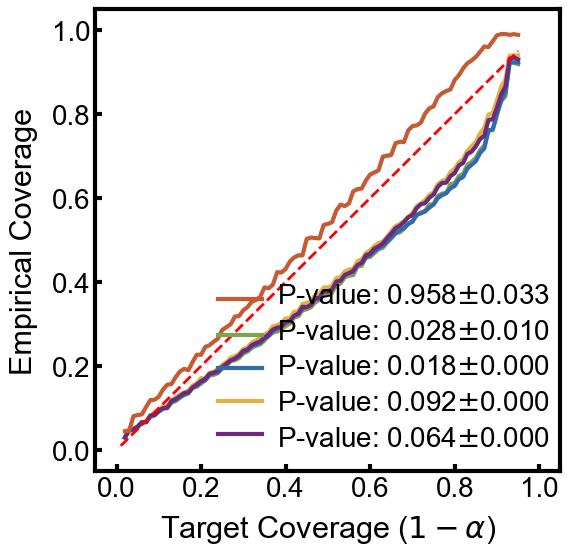

In [85]:
all_alphas = np.arange(0.05, 0.99, 0.01)
fig = plt.figure(figsize=(6, 6))
plt.rcParams['font.family'] = 'Arial'

color_i = [2, 1, 4, 7, 0]

for s_i in range(5): 
    if s_i == 4: 
        avg, ci_lower, ci_upper = compute_ci_mean(baseline_coverage)
        plt.plot(1-all_alphas, avg, color=color_scheme[color_i[s_i]], linewidth=3)
        plt.fill_between(1-all_alphas, ci_lower, ci_upper, color=color_scheme[color_i[s_i]], alpha=.2, linewidth=0)
        pvalue = stats.kstest(all_alphas, avg, alternative='two-sided')[1]
        low_pvalue = stats.kstest(all_alphas, ci_lower, alternative='two-sided')[1]
        if pvalue > 0.999: 
            pvalue = 0.999
        plt.text(0.38, 0.18-0.085*(-2), fr'P-value: {pvalue:.3f}$\pm${np.abs(low_pvalue-pvalue):.3f}', fontsize=20, fontdict=dict(fontstretch = 'condensed'))
        plt.plot([0.24, 0.345], [0.36, 0.36], color=color_scheme[color_i[s_i]], linewidth=3, zorder=8)

    else:
        avg, ci_lower, ci_upper = compute_ci_mean(empirical_coverages[s_i+1,...])
        plt.plot(1-all_alphas, avg, color=color_scheme[color_i[s_i]], linewidth=3)
        plt.fill_between(1-all_alphas, ci_lower, ci_upper, color=color_scheme[color_i[s_i]], alpha=.2, linewidth=0)
        pvalue = stats.kstest(all_alphas, avg, alternative='two-sided')[1]
        low_pvalue = stats.kstest(all_alphas, ci_lower, alternative='two-sided')[1]
        if pvalue > 0.999: 
            pvalue = 0.999
        plt.text(0.38, 0.18-0.085*(s_i-1), fr'P-value: {pvalue:.3f}$\pm${np.abs(low_pvalue-pvalue):.3f}', fontsize=20, fontdict=dict(fontstretch = 'condensed'))
        plt.plot([0.24, 0.345], [0.273-0.0785*s_i, 0.273-0.0785*s_i], color=color_scheme[color_i[s_i]], linewidth=3, zorder=8)

plt.plot(np.arange(0.01, 0.96, 0.01), np.arange(0.01, 0.96, 0.01), 'r--', label='y=x', linewidth=2)  # 'k--' is for black dotted line
plt.grid(False)

plt.tick_params(axis='both',          # Applies to both x and y axis
                which='both',         # Applies to both major and minor ticks
                direction='in',       # Sets ticks to the inside
                bottom=True,          # Enables bottom ticks
                top=False,             # Enables top ticks
                left=True,            # Enables left ticks
                right=False)           # Enables right ticks
plt.tick_params(axis='both', length=5, width=3)

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set the thickness here

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel(r'Target Coverage ($1-\alpha$)', fontsize=22, labelpad=8, fontdict=dict(fontstretch = 'condensed'))
plt.ylabel('Empirical Coverage', fontsize=22, labelpad=10)#, fontdict=dict(weight='bold'))

plt.show()

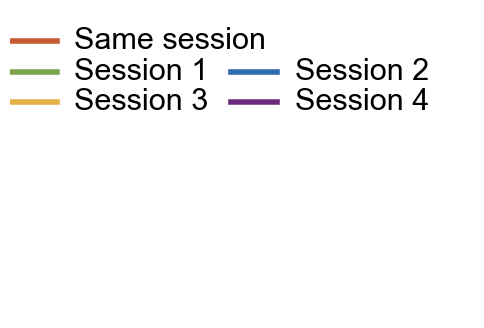

In [134]:
import matplotlib.pyplot as plt

# Define the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
plt.rcParams['font.family'] = 'Arial'
# Hide the actual plot axes
ax.axis('off')

# Coordinates and labels for the custom legend
line_lengths = [0.02] * 9  # Length of each line
line_positions = range(9, 0, -1)  # Vertical positions of the lines
labels = ['Same session', 'Session 1', 'Session 2', 'Session 3', 'Session 4']
color_scheme_idx = [2, 1, 4, 7, 0]

ax.plot([0, 0.02], [9, 9], color=color_scheme[0], lw=4)
ax.text(0.02 + 0.0075, 9, labels[0], verticalalignment='center', fontsize=22)

ax.plot([0, 0.02], [8, 8], color=color_scheme[2], lw=4)
ax.text(0.02 + 0.0075, 8, labels[1], verticalalignment='center', fontsize=22)

ax.plot([0 + 0.0950, 0.02 + 0.0950], [8, 8], color=color_scheme[1], lw=4)
ax.text(0.02 + 0.0075 + 0.0950, 8, labels[2], verticalalignment='center', fontsize=22)

ax.plot([0, 0.02], [7, 7], color=color_scheme[4], lw=4)
ax.text(0.02 + 0.0075, 7, labels[3], verticalalignment='center', fontsize=22)

ax.plot([0 + 0.0950, 0.02 + 0.0950], [7, 7], color=color_scheme[7], lw=4)
ax.text(0.02 + 0.0075 + 0.0950, 7, labels[4], verticalalignment='center', fontsize=22)

# Set the display limits to fit the custom legend
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 10)

plt.show()

In [240]:
acc_avg = []; acc_ci_avg_lower = []; acc_ci_avg_upper = []
pr_avg = []; pr_ci_avg_lower = []; pr_ci_avg_upper = []

for i in range(4): 
    a, cl, cu = compute_ci_mean(accuracies[i])
    acc_avg.append(a.flatten()); acc_ci_avg_lower.append(cl.flatten()), acc_ci_avg_upper.append(cu.flatten())
    pr, cl, cu = compute_ci_mean(prediction_rates[i])
    pr_avg.append(pr.flatten()); pr_ci_avg_lower.append(cl.flatten()), pr_ci_avg_upper.append(cu.flatten())

In [294]:
alpha_max_list = [normalized_f1_score(acc_imp[i], predictin_rates_list[i]) for i in range(4)]

In [201]:
predictin_rates_list[1]

array([0.17378672, 0.16057392, 0.16544096, 0.32036939, 0.34780742,
       0.41202283, 0.49565911, 0.4890323 , 0.55674267, 0.58104089,
       0.61324835, 0.62810016, 0.63726049, 0.67929635, 0.69433176,
       0.72228805, 0.73037188, 0.76200773, 0.76041093, 0.77003405,
       0.80050553, 0.80786541, 0.82311559, 0.83423766, 0.83946234,
       0.86081435, 0.86878676, 0.87990801, 0.89021691, 0.89247609,
       0.90676364, 0.9155093 , 0.92677027, 0.93066648, 0.93553244,
       0.94524379, 0.95018483, 0.9607154 , 0.96288373, 0.97328997,
       0.9748419 , 0.97641051, 0.98354795, 0.98613542, 0.99162995,
       0.99418391, 0.99364707, 0.99673311, 0.9975486 , 0.9984447 ,
       0.9988102 , 0.99973029, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

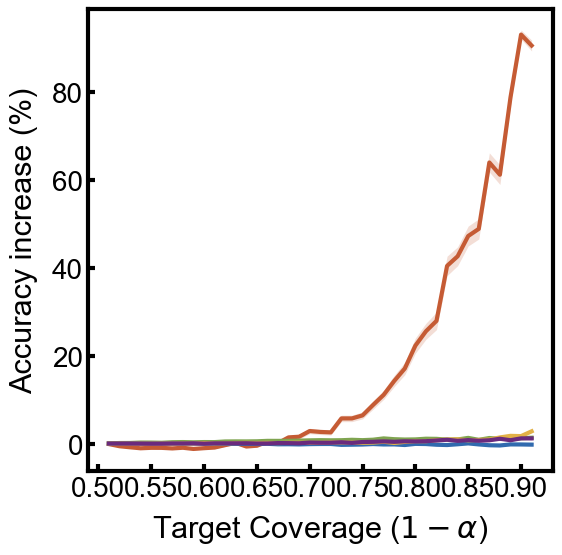

In [318]:
#alpha_max_list = [0,0,0,0]
all_alphas = np.arange(0.05, 0.99, 0.01)
plot_idx = np.logical_and(1-all_alphas <= 0.91, 1-all_alphas >= 0.50)
fig = plt.figure(figsize=(6, 6))
plt.rcParams['font.family'] = 'Arial'
n_i = 0 # 0 = gaussian, 1 = impulse, 2 = motion
color_i = [0, 2, 1, 4, 7, 0]
n_iters = 100
acc_imp = []
x_adj = [0, 0.1, 0, 0]
y_adj = [0.3, -0.15, 0.3, 0.4]

for session_idx in range(0, 5): 
    num = accuracies[session_idx,...] - np.repeat(baseline_accuracy[session_idx], n_iters)[:,None]
    denom = 1 - np.repeat(baseline_accuracy[session_idx], n_iters)[:,None]
    
    avg, ci_lower, ci_upper = compute_ci_mean(100 * num / denom)
    acc_imp.append(avg)
    plt.plot((1-all_alphas)[plot_idx], avg[plot_idx], color=color_scheme[color_i[session_idx]], linewidth=3)
    plt.fill_between((1-all_alphas)[plot_idx], ci_lower[plot_idx], ci_upper[plot_idx], color=color_scheme[color_i[session_idx]], alpha=.2, linewidth=0)

    # alpha_max = (1-all_alphas)[plot_idx][alpha_max_list[session_idx-1]-4]
    # y_max = avg[plot_idx][alpha_max_list[session_idx-1]-4]
    
#     plt.plot([alpha_max, alpha_max], [0., y_max], '--', linewidth=3, color=color_scheme[color_i[session_idx]], alpha=.35)
#     plt.plot([0.5, alpha_max], [y_max, y_max], '--', linewidth=3, color=color_scheme[color_i[session_idx]], alpha=.35)
    
#     plt.text(alpha_max -0.009 + x_adj[session_idx-1], y_max + y_adj[session_idx-1], rf'$\alpha=${1-alpha_max:.2f}', verticalalignment='top', 
#             horizontalalignment='right', fontsize=20, color=color_scheme[color_i[session_idx]])
#     plt.scatter(alpha_max, y_max, marker='o', s=150, color=color_scheme[color_i[session_idx]], linewidths=3, facecolors='none')
# # else: 
    #     num = accuracies[0,...] - np.repeat(baseline_accuracy[0],n_iters)[:,None]
    #     denom = 1 - np.repeat(baseline_accuracy[0], n_iters)[:,None]
        
plt.grid(False)


plt.tick_params(axis='both',          # Applies to both x and y axis
                which='both',         # Applies to both major and minor ticks
                direction='in',       # Sets ticks to the inside
                bottom=True,          # Enables bottom ticks
                top=False,             # Enables top ticks
                left=True,            # Enables left ticks
                right=False)           # Enables right ticks
plt.tick_params(axis='both', length=5, width=3)

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set the thickness here

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'Target Coverage ($1-\alpha$)', fontsize=22, labelpad=8, fontdict=dict(fontstretch = 'condensed'))
plt.ylabel('Accuracy increase (%)', fontsize=22, labelpad=10)#, fontdict=dict(weight='bold'))

plt.show()

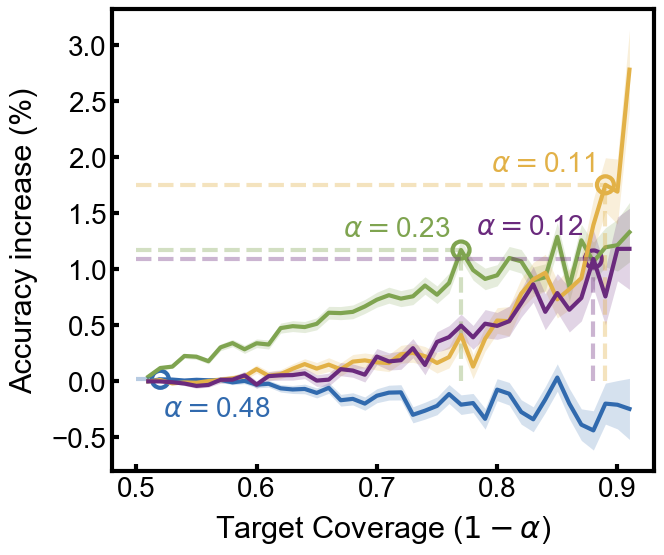

In [319]:
#alpha_max_list = [0,0,0,0]
all_alphas = np.arange(0.05, 0.99, 0.01)
plot_idx = np.logical_and(1-all_alphas <= 0.91, 1-all_alphas >= 0.50)
fig = plt.figure(figsize=(7, 6))
plt.rcParams['font.family'] = 'Arial'
n_i = 0 # 0 = gaussian, 1 = impulse, 2 = motion
color_i = [0, 2, 1, 4, 7, 0]
n_iters = 100
acc_imp = []
x_adj = [0, 0.1, 0, 0]
y_adj = [0.3, -0.15, 0.3, 0.4]

for session_idx in range(1, 5): 
    num = accuracies[session_idx,...] - np.repeat(baseline_accuracy[session_idx], n_iters)[:,None]
    denom = 1 - np.repeat(baseline_accuracy[session_idx], n_iters)[:,None]
    
    avg, ci_lower, ci_upper = compute_ci_mean(100 * num / denom)
    acc_imp.append(avg)
    plt.plot((1-all_alphas)[plot_idx], avg[plot_idx], color=color_scheme[color_i[session_idx]], linewidth=3)
    plt.fill_between((1-all_alphas)[plot_idx], ci_lower[plot_idx], ci_upper[plot_idx], color=color_scheme[color_i[session_idx]], alpha=.2, linewidth=0)

    alpha_max = (1-all_alphas)[plot_idx][alpha_max_list[session_idx-1]-4]
    y_max = avg[plot_idx][alpha_max_list[session_idx-1]-4]
    
    plt.plot([alpha_max, alpha_max], [0., y_max], '--', linewidth=3, color=color_scheme[color_i[session_idx]], alpha=.35)
    plt.plot([0.5, alpha_max], [y_max, y_max], '--', linewidth=3, color=color_scheme[color_i[session_idx]], alpha=.35)
    
    plt.text(alpha_max -0.009 + x_adj[session_idx-1], y_max + y_adj[session_idx-1], rf'$\alpha=${1-alpha_max:.2f}', verticalalignment='top', 
            horizontalalignment='right', fontsize=20, color=color_scheme[color_i[session_idx]])
    plt.scatter(alpha_max, y_max, marker='o', s=150, color=color_scheme[color_i[session_idx]], linewidths=3, facecolors='none')
# else: 
    #     num = accuracies[0,...] - np.repeat(baseline_accuracy[0],n_iters)[:,None]
    #     denom = 1 - np.repeat(baseline_accuracy[0], n_iters)[:,None]
        
plt.grid(False)


plt.tick_params(axis='both',          # Applies to both x and y axis
                which='both',         # Applies to both major and minor ticks
                direction='in',       # Sets ticks to the inside
                bottom=True,          # Enables bottom ticks
                top=False,             # Enables top ticks
                left=True,            # Enables left ticks
                right=False)           # Enables right ticks
plt.tick_params(axis='both', length=5, width=3)

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set the thickness here

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel(r'Target Coverage ($1-\alpha$)', fontsize=22, labelpad=8, fontdict=dict(fontstretch = 'condensed'))
plt.ylabel('Accuracy increase (%)', fontsize=22, labelpad=10)#, fontdict=dict(weight='bold'))

plt.show()

In [221]:
plot_alphas

array([0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19,
       0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41,
       0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])

In [220]:
prediction_rates_avg[43]

0.9884147373532748

In [280]:
prediction_rates.shape

(5, 2500, 94)

In [285]:
alpha_max_list

[18, 43, 6, 7]

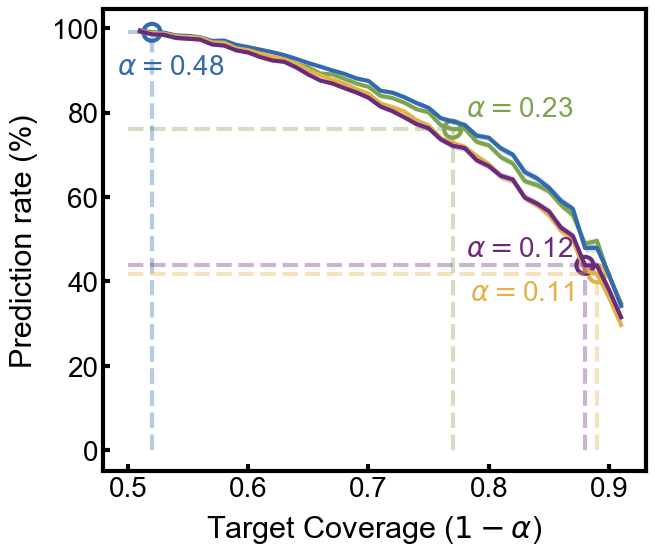

In [354]:
plt.rcParams['font.family'] = 'Arial'

all_alphas = np.arange(0.05, 0.99, 0.01)
plot_idx = np.logical_and(0.09 <= all_alphas, 0.5 >= all_alphas)
plot_alphas = all_alphas[plot_idx]
fig = plt.figure(figsize=(7, 6))
color_i = [0, 2, 1, 4, 7]
predictin_rates_list = []
x_adj = [.0, -.04, -.12, -.11]
y_adj = [8, -5., -1.4, 7]

# alpha_max = plot_alphas[alpha_max_idx]
# alpha_max_same = plot_alphas[alpha_max_same_idx]
for i in range(4): 
    prediction_rates_avg, acc_ci_avg_lower, acc_ci_avg_upper = compute_ci_mean(prediction_rates[i+1])
    plt.plot(1-plot_alphas, 100 * prediction_rates_avg[plot_idx], color=color_scheme[color_i[i+1]], linewidth=3)
    plt.fill_between(1-plot_alphas, 100 * acc_ci_avg_lower[plot_idx], 100 * acc_ci_avg_upper[plot_idx], color=color_scheme[color_i[i+1]], alpha=.2, linewidth=0)
    predictin_rates_list.append(prediction_rates_avg)  
    
    alpha_max = plot_alphas[alpha_max_list[i] - 4]
    acc_avg_max = 100 * prediction_rates_avg[plot_idx][alpha_max_list[i] - 4]
    plt.plot([1-alpha_max, 1-alpha_max], [0., acc_avg_max], '--', linewidth=3, color=color_scheme[color_i[i+1]], alpha=.35)
    plt.plot([0.5, 1-alpha_max], [acc_avg_max, acc_avg_max], '--', linewidth=3, color=color_scheme[color_i[i+1]], alpha=.35)
    plt.text(1-alpha_max + 0.1+x_adj[i], acc_avg_max - 0.1+y_adj[i], rf'$\alpha=${alpha_max:.2f}', verticalalignment='top', 
            horizontalalignment='right', fontsize=20, color=color_scheme[color_i[i+1]])
    plt.scatter(1-alpha_max, acc_avg_max, marker='o', s=150, color=color_scheme[color_i[i+1]], linewidths=3, facecolors='none')


plt.tick_params(axis='both',          # Applies to both x and y axis
                which='both',         # Applies to both major and minor ticks
                direction='in',       # Sets ticks to the inside
                bottom=True,          # Enables bottom ticks
                top=False,             # Enables top ticks
                left=True,            # Enables left ticks
                right=False)           # Enables right ticks
plt.tick_params(axis='both', length=5, width=3)

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set the thickness here

plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.xticks(list(np.arange(0.5, 0.91, 0.1)), labels=['0.5', '0.6', '0.7', '0.8', '0.9'], fontsize=20) 
plt.locator_params(axis='y', nbins=6)
plt.xlabel(r'Target Coverage ($1-\alpha$)', fontsize=22, labelpad=8, fontdict=dict(fontstretch = 'condensed'))
plt.ylabel('Prediction rate (%)', fontsize=22, labelpad=10, fontdict=dict(fontstretch = 'condensed'))#, fontdict=dict(weight='bold'))
plt.show()

In [368]:
len(all_X_test)

25

In [377]:
# True labels are treated as when the classifier gives us correct labels VS incorrect labels. 
# I.e., the CP abstaining framework is treated like a binary classifier on when to abstain or not. 

np.random.seed(42)

all_alphas = list(np.arange(0.01, 0.95, 0.01))

n_iters = 50
true_positives = np.zeros((5, 25, len(all_alphas), n_iters)); true_negatives = np.zeros((5, 25, len(all_alphas), n_iters))
false_positives = np.zeros((5, 25, len(all_alphas), n_iters)); false_negatives = np.zeros((5, 25, len(all_alphas), n_iters))
baseline_accuracies = np.zeros((5, 25))

for session_i in tqdm(range(4)): 
    for subject_num in tqdm(range(25), total=25): 
        model = all_models[subject_num]
        X_val = all_X_val[subject_num]; y_val = all_y_val[subject_num]
        X_test = all_X_test[subject_num][session_i]; y_test = all_y_test[subject_num][session_i]

        val_smx = model.predict(X_val, verbose=False); test_smx = model.predict(X_test, verbose=False)
        true_abstain = test_smx.argmax(1) != y_test.argmax(1); true_noabstain = ~true_abstain

        for i_alpha, alpha in enumerate(all_alphas): 
            for j in range(n_iters): 
                ps, _ = conformalRAPS(val_smx, y_val, test_smx, alpha=1-alpha, lam_reg=.01, k_reg=0, rand=True, disallow_zero_sets=True, verbose=False)
                pred_abstain = np.sum(ps, axis=1) > 1; pred_noabstain = np.sum(ps, axis=1) == 1
                tp = np.sum(np.logical_and(pred_abstain, true_abstain)); fp = np.sum(np.logical_and(pred_abstain, true_noabstain))
                fn = np.sum(np.logical_and(pred_noabstain, true_abstain)); tn = np.sum(np.logical_and(pred_noabstain, true_noabstain))
                assert tp + fp + fn + tn == X_test.shape[0]
                        
                true_positives[session_i, subject_num, i_alpha, j] = tp
                true_negatives[session_i, subject_num, i_alpha, j] = tn
                false_positives[session_i, subject_num, i_alpha, j] = fp
                false_negatives[session_i, subject_num, i_alpha, j] = fn
        baseline_accuracies[session_i, subject_num] = np.mean(true_noabstain)

np.save(f'{save_path}true_positives.npy', true_positives)
np.save(f'{save_path}true_negatives.npy', true_negatives)
np.save(f'{save_path}false_positives.npy', false_positives)
np.save(f'{save_path}false_negatives.npy', false_negatives)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [417]:
true_positives.shape

(5, 25, 94, 50)

In [378]:
all_tpr = []; all_fpr = []; all_precision = []
for i in range(4): 
    tpr, fpr, precision = compute_matrix_quantities(true_positives[i,...], true_negatives[i,...], false_positives[i,...], false_negatives[i,...])
    all_tpr.append(tpr); all_fpr.append(fpr); all_precision.append(precision)

/Users/seonghyunyoon/Developer/conformal_prediction_bmi/plotting.py:682: RuntimeWarning: invalid value encountered in divide
  precision_array = true_positives[subject_num] / (true_positives[subject_num] + false_positives[subject_num])


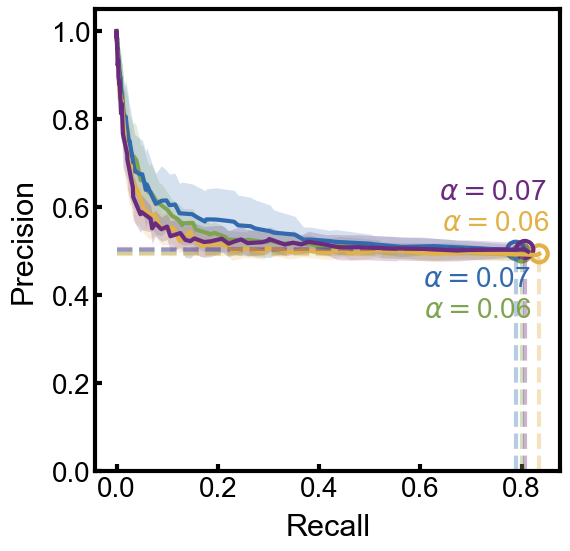

In [413]:
fig = plt.figure(figsize=(6, 6))
plt.rcParams['font.family'] = 'Arial'
color_i = [2, 1, 4, 7]
x_adj = [.02, .028, .02, .043]
y_adj = [-0.1, -0.035, 0.1, 0.16]
y_area_adj = [0, 0.075, 0, 0]

for i in range(4): 
    naive_precision = np.mean(1-baseline_accuracies[i, :])
    tpr_mean, ci_lower_tpr, ci_upper_tpr = compute_ci_mean(all_tpr[i])
    precision_mean, ci_lower_pre, ci_upper_pre = compute_ci_mean(all_precision[i])
    sort_index = np.argsort(tpr_mean)
    f1_scores = 2 * (precision_mean * tpr_mean) / (precision_mean + tpr_mean)
    # Find the threshold that maximizes the F1 score
    max_f1_index = np.argmax(f1_scores)
    alpha_max = (1 - np.arange(0.01, 0.95, 0.01))[sort_index][max_f1_index]
    precision_max = precision_mean[max_f1_index]
    tpr_max = tpr_mean[max_f1_index]
    
    tpr_sorted = tpr_mean[sort_index]
    ci_lower_tpr = ci_lower_tpr[sort_index]
    ci_upper_tpr = ci_upper_tpr[sort_index]
    precision_sorted = precision_mean[sort_index]
    ci_lower_pre = ci_lower_pre[sort_index]
    ci_upper_pre = ci_upper_pre[sort_index]
    area = np.trapz(precision_sorted, tpr_sorted)
    area_lower = np.trapz(ci_lower_pre, tpr_sorted)
    
    # Plot 1: Target Coverage (x) & Empirical Coverage
    plt.plot(tpr_sorted, precision_sorted, color=color_scheme[color_i[i]], linewidth=3)
    plt.fill_between(tpr_sorted, ci_lower_pre, ci_upper_pre, color=color_scheme[color_i[i]], alpha=.2, linewidth=0)
    plt.text(tpr_max+x_adj[i], precision_max+y_adj[i], rf'$\alpha=${alpha_max:.2f}', verticalalignment='top', horizontalalignment='right', 
             fontsize=20, color=color_scheme[color_i[i]])
    plt.scatter(tpr_max, precision_max, marker='o', s=150, color=color_scheme[color_i[i]], linewidths=3, facecolors='none')
    
    plt.plot([tpr_max, tpr_max], [0, precision_max], '--', linewidth=3, color=color_scheme[color_i[i]], alpha=.35)
    plt.plot([np.min(tpr_sorted), tpr_max], [precision_max, precision_max], '--', linewidth=3, color=color_scheme[color_i[i]], alpha=.35)
    
    plt.grid(False)

    plt.tick_params(axis='both',          # Applies to both x and y axis
                    which='both',         # Applies to both major and minor ticks
                    direction='in',       # Sets ticks to the inside
                    bottom=True,          # Enables bottom ticks
                    top=False,             # Enables top ticks
                    left=True,            # Enables left ticks
                    right=False)           # Enables right ticks
    plt.tick_params(axis='both', length=5, width=3)
    
    for spine in plt.gca().spines.values():
        spine.set_linewidth(3)  # Set the thickness here


    # plt.text(0.45, 0.05+y_area_adj[i], rf'Area: {area:.3f}$\pm${(area-area_lower):.3f}', fontsize=20, fontdict=dict(fontstretch = 'condensed'))
    # plt.plot([0.32, 0.42], [0.068+y_area_adj[i], 0.068+y_area_adj[i]], color=color_scheme[color_i[i]], linewidth=3)
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim(0, 1.05)
    plt.xlabel('Recall', fontsize=22, labelpad=8, fontdict=dict(fontstretch = 'condensed'))
    plt.ylabel('Precision', fontsize=22, labelpad=10)#, fontdict=dict(weight='bold'))
    
#plt.text(0.56, 0.2, rf'Baseline: {naive_precision:.3f}', fontsize=20, fontdict=dict(fontstretch = 'condensed'))
plt.show()

In [433]:
compute_ci_mean(all_tpr[0])[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00005302, 0.00007646, 0.0001498 , 0.00025214,
       0.00035555, 0.00043319, 0.0003266 , 0.00081054, 0.00080188,
       0.00123324, 0.00212083, 0.00243462, 0.00390273, 0.00413484,
       0.00511144, 0.00765584, 0.00782987, 0.01164441, 0.010079  ,
       0.01387757, 0.02298093, 0.02493265, 0.03353522, 0.03449283,
       0.03917288, 0.04790364, 0.05158195, 0.06369299, 0.06758341,
       0.07808703, 0.08418183, 0.08860234, 0.1007265 , 0.10950163,
       0.12174466, 0.13042172, 0.12939432, 0.15102237, 0.15676354,
       0.17974904, 0.18445898, 0.19421474, 0.21552044, 0.21841

In [432]:
compute_ci_mean(all_fpr[0])[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00002424, 0.00007869, 0.00007626, 0.00005039,
       0.00033368, 0.0003387 , 0.00019751, 0.00034218, 0.00039934,
       0.00088711, 0.00111683, 0.00149552, 0.00210005, 0.00271683,
       0.00293155, 0.00479796, 0.00469451, 0.00749616, 0.00693373,
       0.01059097, 0.01627871, 0.01963836, 0.02371717, 0.02536263,
       0.02779279, 0.03847396, 0.04046308, 0.04920635, 0.05358396,
       0.06373293, 0.06849139, 0.07265135, 0.08256541, 0.0925108 ,
       0.10301244, 0.11352642, 0.1134174 , 0.13047673, 0.13794462,
       0.15776934, 0.16468888, 0.17261011, 0.19558389, 0.20072

Area under the curve: 0.5153782657204944 $\plusminus$ -0.13678534528857716
Area under the curve: 0.4961094175280638 $\plusminus$ -0.11824448191844322
Area under the curve: 0.5098777350436846 $\plusminus$ -0.09582917138053693
Area under the curve: 0.5035030686057768 $\plusminus$ -0.09809127659310762


<Figure size 600x600 with 0 Axes>

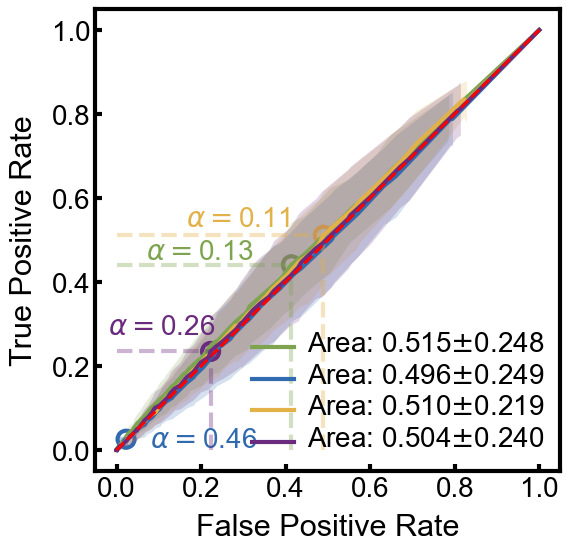

In [463]:
import matplotlib.patches as patches 

fig = plt.figure(figsize=(6, 6))
plt.rcParams['font.family'] = 'Arial'
color_i = [2, 1, 4, 7]
x_adj = [-0.09, 0.31, -0.08, 0.01]
y_adj = [0.06, 0.03, 0.07, 0.09]
y_area_adj = [-0.075, 0, 0.075, 0.075*2, 0.075*3]

# naive_precision = np.mean(1-baseline_accuracies)
fig = plt.figure(figsize=(6, 6))
clip_rect = patches.Rectangle((0, 0), 1, 1, transform=ax.transData, edgecolor='none', facecolor='none')

for i in range(4): 
    fpr_mean, ci_lower_fpr, ci_upper_fpr = compute_ci_mean(all_fpr[i])
    tpr_mean, ci_lower_tpr, ci_upper_tpr = compute_ci_mean(all_tpr[i])

    sort_index = np.argsort(fpr_mean)
    tpr_sorted = np.insert(np.append(tpr_mean[sort_index], 1), 0, 0)
    fpr_sorted = np.insert(np.append(fpr_mean[sort_index], 1), 0, 0)
    ci_lower_fpr = ci_lower_fpr[sort_index]
    ci_upper_fpr = ci_upper_fpr[sort_index]
    ci_lower_tpr = ci_lower_tpr[sort_index]
    ci_upper_tpr = ci_upper_tpr[sort_index]

    j_index = tpr_sorted - fpr_sorted  # Youden's J statistic
    max_j_index = np.argmax(j_index)

    if max_j_index == 52: 
        max_j_index = 98
    alpha_max = (1 - np.arange(0.01, 1.00, 0.01))[sort_index][max_j_index]
    tpr_max = tpr_sorted[max_j_index]
    fpr_max = fpr_sorted[max_j_index]
    if max_j_index == 98: 
        tpr_max = 1; fpr_max= 1
        
    area = np.trapz(tpr_sorted, fpr_sorted)
    area_upper = np.trapz(ci_upper_tpr, fpr_sorted[1:-1])
    area_lower = np.trapz(ci_lower_tpr, fpr_sorted[1:-1])
    print(f"Area under the curve: {area} $\plusminus$ {area_upper-area}")


    plt.rcParams['font.family'] = 'Arial'
    plt.plot(fpr_sorted, tpr_sorted, color=color_scheme[color_i[i]], linewidth=3, clip_path=clip_rect)
    plt.fill_between(fpr_sorted[1:-1], ci_lower_tpr, ci_upper_tpr, color=color_scheme[color_i[i]], alpha=.2, linewidth=0, clip_path=clip_rect)

    plt.plot([0, 1], [0, 1], 'r--', label='y=x', linewidth=2, clip_path=clip_rect)  # 'k--' is for black dotted line
    
    plt.text(fpr_max+x_adj[i], tpr_max+y_adj[i], rf'$\alpha=${alpha_max:.2f}', verticalalignment='top', horizontalalignment='right', 
             fontsize=20, color=color_scheme[color_i[i]], zorder=2, clip_path=clip_rect)
    plt.scatter(fpr_max, tpr_max, marker='o', s=150, color=color_scheme[color_i[i]], linewidths=3, facecolors='none', clip_path=clip_rect)
    
    plt.plot([fpr_max, fpr_max], [0, tpr_max], '--', linewidth=3, color=color_scheme[color_i[i]], alpha=.35, clip_path=clip_rect)
    plt.plot([0, fpr_max], [tpr_max, tpr_max], '--', linewidth=3, color=color_scheme[color_i[i]], alpha=.35, clip_path=clip_rect)
    
    plt.grid(False)

    plt.tick_params(axis='both',          # Applies to both x and y axis
                    which='both',         # Applies to both major and minor ticks
                    direction='in',       # Sets ticks to the inside
                    bottom=True,          # Enables bottom ticks
                    top=False,             # Enables top ticks
                    left=True,            # Enables left ticks
                    right=False)           # Enables right ticks
    plt.tick_params(axis='both', length=5, width=3)

    for spine in plt.gca().spines.values():
        spine.set_linewidth(3)  # Set the thickness here

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.plot([0.32, 0.42], [0.17-y_area_adj[i], 0.17-y_area_adj[i]], color=color_scheme[color_i[i]], linewidth=3)
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.xlabel('False Positive Rate', fontsize=22, labelpad=8, fontdict=dict(fontstretch = 'condensed'))
    plt.ylabel('True Positive Rate', fontsize=22, labelpad=10)#, fontdict=dict(weight='bold'))
    plt.text(0.45, 0.16-y_area_adj[i], rf'Area: {area:.3f}$\pm${(area-area_lower):.3f}', fontsize=20, fontdict=dict(fontstretch = 'condensed'))

plt.show()